In [1]:
# This notebook is for predicting the heart failure using all the features and the selected features after feature selection

In [2]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load and read the dataset

df = pd.read_csv('Riza_Capstone_Original Dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# Check if the datatypes are correct for all columns

df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
# age must be int64
df['age'] = df['age'].astype('int64')

# anaemia must be int64
df['anaemia'] = df['anaemia'].astype('int64')

# creatinine_phosphokinase must be float64
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].astype('int64')

# platelets must be int64
df['platelets'] = df['platelets'].astype('int64')


## Look again at the datatypes after corrections

df.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
# Create an independent variable X

X = df.iloc[:, 1:12].values
X

array([[0.000e+00, 5.820e+02, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [0.000e+00, 7.861e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [0.000e+00, 1.460e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [0.000e+00, 2.060e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [0.000e+00, 2.413e+03, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [0.000e+00, 1.960e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [7]:
# Create a dependent variable Y

Y = df.iloc[:, 12:].values
Y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [8]:
# Perform feature scaling

from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X[:, [1, 3, 5, 7, 8, 9]] = minmaxscaler.fit_transform(X[:, [1, 3, 5, 7, 8, 9]])

In [9]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, train_size = 0.70, random_state=0)

In [10]:
# To Show the Shapes of X and Y Data
print(X.shape)
print(Y.shape)

(299, 11)
(299, 1)


In [11]:
# To Show the Shapes of the New X Objects
print(X_train.shape)
print(X_test.shape)

(209, 11)
(90, 11)


In [12]:
# To Show the Shapes of the New Y Objects
print(Y_train.shape)
print(Y_test.shape)

(209, 1)
(90, 1)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [14]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('NN', MLPClassifier()))
models

[('LR', LogisticRegression(max_iter=1000000)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('NN', MLPClassifier())]

In [15]:
# For Test Options and Evaluation Metric
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models:
	k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
	cv_results = cross_val_score(model, X, Y, cv=k_Fold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	printed_results = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(printed_results)

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LR: 0.826437 (0.060702)
LDA: 0.819425 (0.039845)
KNN: 0.842874 (0.053670)
CART: 0.759540 (0.047998)
NB: 0.742299 (0.050545)
SVM: 0.822414 (0.064686)


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizat

NN: 0.836092 (0.069090)


C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Logistic Regression

In [17]:
# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(max_iter=100000, random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

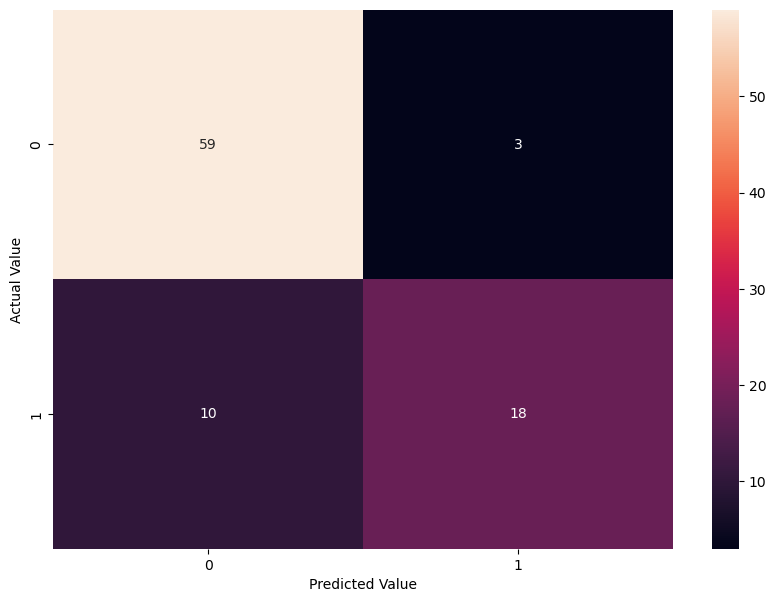

In [18]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [19]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8556



In [20]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        62
           1       0.86      0.64      0.73        28

    accuracy                           0.86        90
   macro avg       0.86      0.80      0.82        90
weighted avg       0.86      0.86      0.85        90



In [21]:
# K-Nearest Neighbors

In [22]:
# To Instantiate the Model (Using the Default Parameters)
k_nearest_neighbors = KNeighborsClassifier()

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

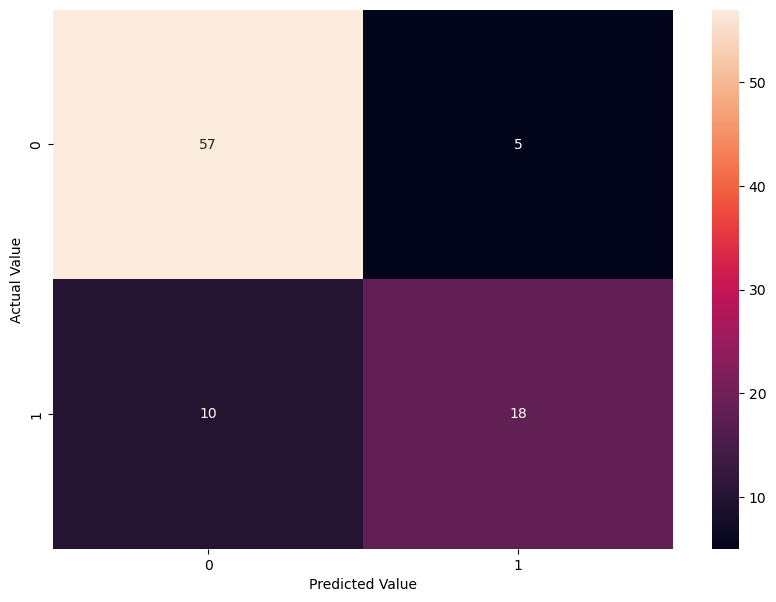

In [23]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [24]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8333



In [25]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        62
           1       0.78      0.64      0.71        28

    accuracy                           0.83        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.83      0.83      0.83        90



In [26]:
# Support Vector Machine

In [27]:
# To Instantiate the Model (Using the Default Parameters)
support_vector_machine = SVC(random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
support_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_SVM = support_vector_machine.predict(X_test)
Y_predict_SVM

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

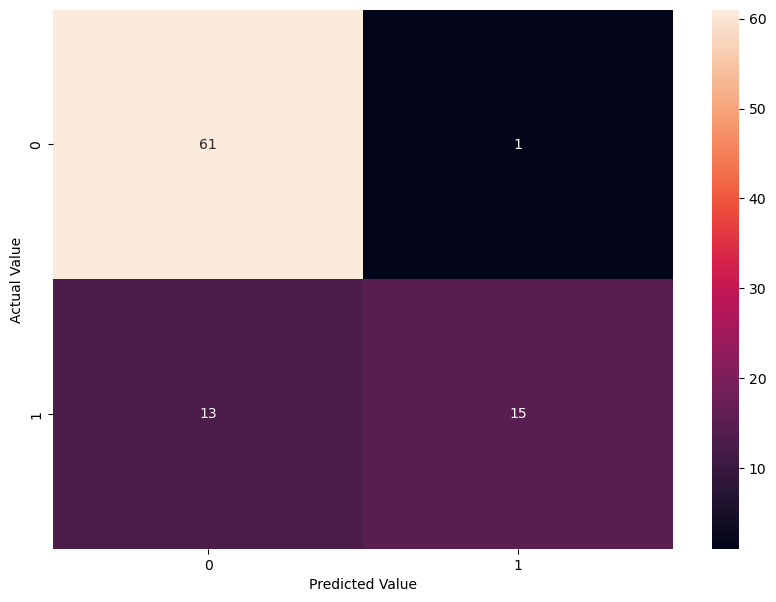

In [28]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [29]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8444



In [30]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90        62
           1       0.94      0.54      0.68        28

    accuracy                           0.84        90
   macro avg       0.88      0.76      0.79        90
weighted avg       0.86      0.84      0.83        90



In [31]:
# Now create another dataframe containing the selected features on feature selection

In [32]:
# Create an independent variable X_new
# Note that this will contain only the chosen features that underwent feature selection

new_df = df[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'sex', 'smoking']]
new_df

,age,anaemia,diabetes,high_blood_pressure,platelets,serum_creatinine,sex,smoking
0,75,0,0,1,265000,1.9,1,0
1,55,0,0,0,263358,1.1,1,0
2,65,0,0,0,162000,1.3,1,1
3,50,1,0,0,210000,1.9,1,0
4,65,1,1,0,327000,2.7,0,0
...,...,...,...,...,...,...,...,...
294,62,0,1,1,155000,1.1,1,1
295,55,0,0,0,270000,1.2,0,0
296,45,0,1,0,742000,0.8,0,0
297,45,0,0,0,140000,1.4,1,1


In [33]:
X_new = new_df.iloc[:, 0:9].values
X_new

array([[75. ,  0. ,  0. , ...,  1.9,  1. ,  0. ],
       [55. ,  0. ,  0. , ...,  1.1,  1. ,  0. ],
       [65. ,  0. ,  0. , ...,  1.3,  1. ,  1. ],
       ...,
       [45. ,  0. ,  1. , ...,  0.8,  0. ,  0. ],
       [45. ,  0. ,  0. , ...,  1.4,  1. ,  1. ],
       [50. ,  0. ,  0. , ...,  1.6,  1. ,  1. ]])

In [34]:
# Perform feature scaling

from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X_new[:, [1, 5, 6]] = minmaxscaler.fit_transform(X_new[:, [1, 5, 6]])

In [35]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.30, train_size = 0.70, random_state=0)

In [36]:
# Re-run all the models using the selected features

In [37]:
# Logistic Regression

In [38]:
# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(max_iter=100000, random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

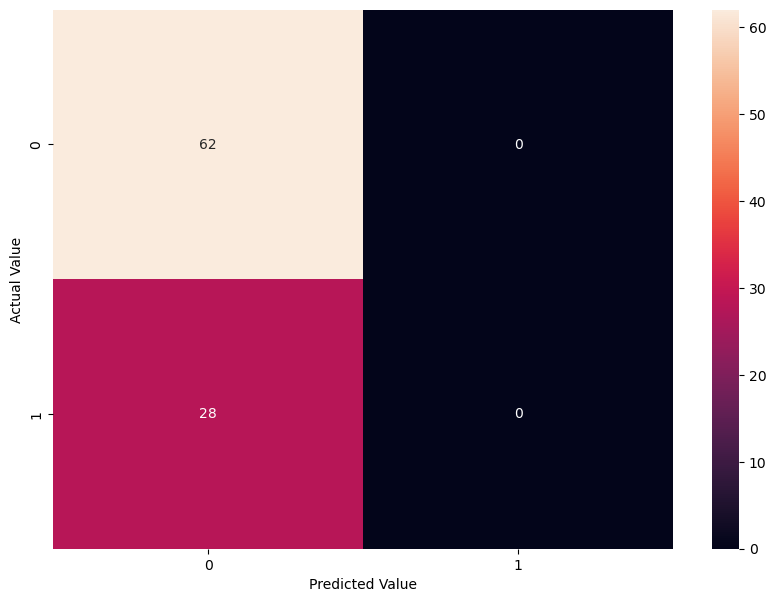

In [39]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [40]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.6889



In [41]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        62
           1       0.00      0.00      0.00        28

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90



C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# K-Nearest Neighbors

In [43]:
# To Instantiate the Model (Using the Default Parameters)
k_nearest_neighbors = KNeighborsClassifier()

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

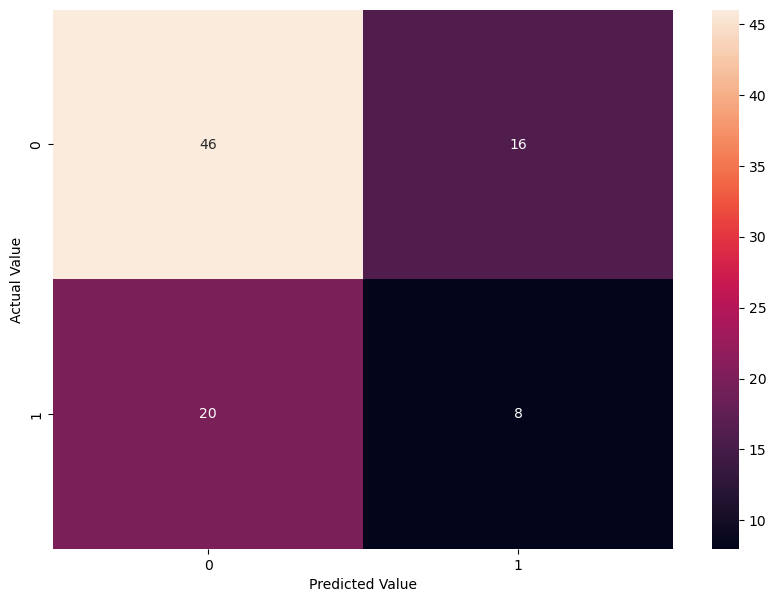

In [44]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [45]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.6000



In [46]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        62
           1       0.33      0.29      0.31        28

    accuracy                           0.60        90
   macro avg       0.52      0.51      0.51        90
weighted avg       0.58      0.60      0.59        90



In [47]:
# Support Vector Machine

In [48]:
# To Instantiate the Model (Using the Default Parameters)
support_vector_machine = SVC(random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
support_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_SVM = support_vector_machine.predict(X_test)
Y_predict_SVM

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Value')

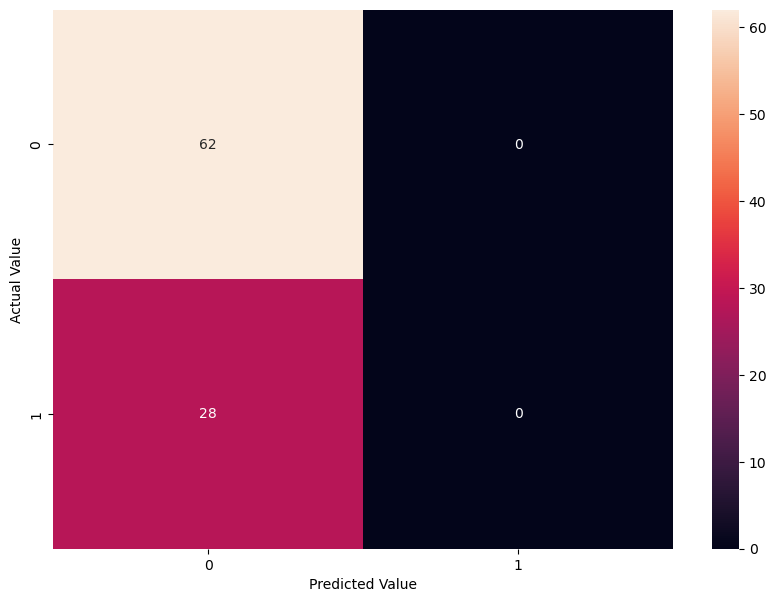

In [49]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [50]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.6889



In [51]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        62
           1       0.00      0.00      0.00        28

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90



C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
